# Accidental Drug Related Deaths 2012-2021

## DAB 304 - Semester 3 Project (Fall 2022)
### By Group 5

Dataset Link: https://catalog.data.gov/dataset/accidental-drug-related-deaths-2012-2018

## Imports

In [ ]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

## Load Data

In [ ]:
df = pd.read_csv("https://data.ct.gov/api/views/rybz-nyjw/rows.csv?accessType=DOWNLOAD")
df

,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,...,Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo
0,05/29/2012,Date of death,37.0,Male,Black,NaN,STAMFORD,FAIRFIELD,NaN,STAMFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","CT\n(41.575155, -72.738288)"
1,06/27/2012,Date of death,37.0,Male,White,NaN,NORWICH,NEW LONDON,NaN,NORWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NORWICH, CT\n(41.524304, -72.075821)","NORWICH, CT\n(41.524304, -72.075821)","Norwich, CT\n(41.524304, -72.075821)"
2,03/24/2014,Date of death,28.0,Male,White,NaN,HEBRON,NaN,NaN,HEBRON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"HEBRON, CT\n(41.658069, -72.366324)","HEBRON, CT\n(41.658069, -72.366324)","Marlborough, CT\n(41.632043, -72.461309)"
3,12/31/2014,Date of death,26.0,Female,White,NaN,BALTIC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BALTIC, CT\n(41.617221, -72.085031)","CT\n(41.575155, -72.738288)","Baltic, CT\n(41.617221, -72.085031)"
4,01/16/2016,Date of death,41.0,Male,White,NaN,SHELTON,FAIRFIELD,CT,SHELTON,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)","Bridgeport, CT\n(41.179195, -73.189476)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9197,10/19/2021,Date of death,56.0,Male,Black or African American,NaN,STAMFORD,FAIRFIELD,CT,STAMFORD,...,NaN,NaN,NaN,NaN,NaN,Y,PCP,"STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","Stamford, CT\n(41.051924, -73.539475)"
9198,05/04/2021,Date of death,48.0,Male,Black or African American,NaN,WEST HAVEN,NEW HAVEN,CT,WEST HAVEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"WEST HAVEN, CT\n(41.272336, -72.949817)","WEST HAVEN, CT\n(41.272336, -72.949817)","New Haven, CT\n(41.308252, -72.924161)"
9199,05/15/2021,Date of death,59.0,Male,White,NaN,WETHERSFIELD,HARTFORD,CT,WETHERSFIELD,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,"WETHERSFIELD, CT\n(41.712487, -72.663607)","WETHERSFIELD, CT\n(41.712487, -72.663607)","Hartford, CT\n(41.765775, -72.673356)"
9200,05/28/2021,Date of death,68.0,Male,Black or African American,NaN,HARTFORD,HARTFORD,CT,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"HARTFORD, CT\n(41.765775, -72.673356)","HARTFORD, CT\n(41.765775, -72.673356)","Hartford, CT\n(41.765775, -72.673356)"


In [ ]:
pres_df = pd.read_csv("https://data.ct.gov/api/views/bi8r-vhrp/rows.csv?accessType=DOWNLOAD")
pres_df

,Year,Controlled Substance Prescriptions,Non-Controlled Substance Prescriptions,Opioid Prescriptions,Benzodiazepine Prescriptions
0,2014,6064563,0,2602050,1729192
1,2015,6249637,0,2625042,1667184
2,2016,6545550,0,2510702,1687910
3,2017,6724447,0,2161959,1617171
4,2018,6908152,0,1960988,1532053
5,2019,7330910,0,1946427,1458611
6,2020,8516519,0,1785575,1454611
7,2021,9188536,1908526,1731539,1396682


In [ ]:
admissions_df = pd.read_csv("https://data.ct.gov/api/views/4pv7-jhxb/rows.csv?accessType=DOWNLOAD")
admissions_df

,FiscalYear,Town,Admissions,Unduplicated Clients,TownGeo
0,2016,Suffield,35.0,24.0,"Suffield, CT\n(41.983549, -72.663124)"
1,2014,Thomaston,51.0,34.0,"Thomaston, CT\n(41.674124, -73.073189)"
2,2013,Sprague,35.0,16.0,"Sprague, CT\n(41.640692, -72.066224)"
3,2015,Monroe,83.0,46.0,"Monroe, CT\n(41.331612, -73.206797)"
4,2016,Cheshire,85.0,50.0,"Cheshire, CT\n(41.498834, -72.901448)"
...,...,...,...,...,...
845,2012,Salisbury,6.0,NaN,"Salisbury, CT\n(41.983411, -73.422268)"
846,2013,Bridgewater,7.0,NaN,"Bridgewater, CT\n(41.535109, -73.366386)"
847,2012,Lisbon,NaN,NaN,"Lisbon, CT\n(41.614599, -71.960584)"
848,2016,Goshen,15.0,NaN,"Goshen, CT\n(41.831925, -73.225323)"


In [ ]:
admissions_df.set_index("FiscalYear").to_excel("admissions.xlsx")

In [ ]:
pres_df.set_index("Year").to_excel("prescriptions.xlsx")

## Summarize Data

In [ ]:
df.head()

,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,...,Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo
0,05/29/2012,Date of death,37.0,Male,Black,NaN,STAMFORD,FAIRFIELD,NaN,STAMFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","CT\n(41.575155, -72.738288)"
1,06/27/2012,Date of death,37.0,Male,White,NaN,NORWICH,NEW LONDON,NaN,NORWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NORWICH, CT\n(41.524304, -72.075821)","NORWICH, CT\n(41.524304, -72.075821)","Norwich, CT\n(41.524304, -72.075821)"
2,03/24/2014,Date of death,28.0,Male,White,NaN,HEBRON,NaN,NaN,HEBRON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"HEBRON, CT\n(41.658069, -72.366324)","HEBRON, CT\n(41.658069, -72.366324)","Marlborough, CT\n(41.632043, -72.461309)"
3,12/31/2014,Date of death,26.0,Female,White,NaN,BALTIC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BALTIC, CT\n(41.617221, -72.085031)","CT\n(41.575155, -72.738288)","Baltic, CT\n(41.617221, -72.085031)"
4,01/16/2016,Date of death,41.0,Male,White,NaN,SHELTON,FAIRFIELD,CT,SHELTON,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)","Bridgeport, CT\n(41.179195, -73.189476)"


In [ ]:
df.tail()

,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,...,Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo
9197,10/19/2021,Date of death,56.0,Male,Black or African American,NaN,STAMFORD,FAIRFIELD,CT,STAMFORD,...,NaN,NaN,NaN,NaN,NaN,Y,PCP,"STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","Stamford, CT\n(41.051924, -73.539475)"
9198,05/04/2021,Date of death,48.0,Male,Black or African American,NaN,WEST HAVEN,NEW HAVEN,CT,WEST HAVEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"WEST HAVEN, CT\n(41.272336, -72.949817)","WEST HAVEN, CT\n(41.272336, -72.949817)","New Haven, CT\n(41.308252, -72.924161)"
9199,05/15/2021,Date of death,59.0,Male,White,NaN,WETHERSFIELD,HARTFORD,CT,WETHERSFIELD,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,"WETHERSFIELD, CT\n(41.712487, -72.663607)","WETHERSFIELD, CT\n(41.712487, -72.663607)","Hartford, CT\n(41.765775, -72.673356)"
9200,05/28/2021,Date of death,68.0,Male,Black or African American,NaN,HARTFORD,HARTFORD,CT,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"HARTFORD, CT\n(41.765775, -72.673356)","HARTFORD, CT\n(41.765775, -72.673356)","Hartford, CT\n(41.765775, -72.673356)"
9201,12/24/2021,Date of death,29.0,Male,White,Not Spanish/Hispanic/Latino,SEYMOUR,NEW HAVEN,CT,SEYMOUR,...,Y,NaN,NaN,NaN,NaN,Y,NaN,"SEYMOUR, CT\n(41.395594, -73.073581)","SEYMOUR, CT\n(41.395594, -73.073581)","Seymour, CT\n(41.395594, -73.073581)"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           9202 non-null   object 
 1   Date Type                      9202 non-null   object 
 2   Age                            9200 non-null   float64
 3   Sex                            9194 non-null   object 
 4   Race                           9178 non-null   object 
 5   Ethnicity                      1287 non-null   object 
 6   Residence City                 8813 non-null   object 
 7   Residence County               8160 non-null   object 
 8   Residence State                7426 non-null   object 
 9   Injury City                    9024 non-null   object 
 10  Injury County                  5914 non-null   object 
 11  Injury State                   6290 non-null   object 
 12  Injury Place                   9100 non-null   o

In [ ]:
df.describe()

,Age
count,9200.000000
mean,43.023370
std,12.502644
min,14.000000
25%,33.000000
50%,43.000000
75%,53.000000
max,87.000000


### Shape of the data

In [ ]:
print(f"Rows : {df.shape[0]}")
print(f"Columns : {df.shape[1]}")

Rows : 9202
Columns : 48


### Column Names

In [ ]:
print(f"\nAttributes:\n {df.columns.tolist()}")


Attributes:
 ['Date', 'Date Type', 'Age', 'Sex', 'Race', 'Ethnicity', 'Residence City', 'Residence County', 'Residence State', 'Injury City', 'Injury County', 'Injury State', 'Injury Place', 'Description of Injury', 'Death City', 'Death County', 'Death State', 'Location', 'Location if Other', 'Cause of Death', 'Manner of Death', 'Other Significant Conditions ', 'Heroin', 'Heroin death certificate (DC)', 'Cocaine', 'Fentanyl', 'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine', 'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)', 'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine', 'Other Opioid', 'Any Opioid', 'Other', 'ResidenceCityGeo', 'InjuryCityGeo', 'DeathCityGeo']


### Percentage of missing values

In [ ]:
## Displaying the number of the missing values

print('Percentage of missing values : \n\n', (100*df.isnull().sum()/df.shape[0]).round(2))

Percentage of missing values : 

 Date                              0.00
Date Type                         0.00
Age                               0.02
Sex                               0.09
Race                              0.26
Ethnicity                        86.01
Residence City                    4.23
Residence County                 11.32
Residence State                  19.30
Injury City                       1.93
Injury County                    35.73
Injury State                     31.65
Injury Place                      1.11
Description of Injury             8.60
Death City                        0.05
Death County                     12.08
Death State                      25.31
Location                          0.24
Location if Other                90.88
Cause of Death                    0.00
Manner of Death                   0.10
Other Significant Conditions     91.14
Heroin                           63.63
Heroin death certificate (DC)    91.96
Cocaine                       

### Unique Values per column

In [ ]:
## Displaying unique values per column

print('Unique values per column :\n\n', df.nunique())

Unique values per column :

 Date                             3163
Date Type                           2
Age                                68
Sex                                 2
Race                               13
Ethnicity                           5
Residence City                    485
Residence County                  135
Residence State                    32
Injury City                       289
Injury County                      16
Injury State                        6
Injury Place                       91
Description of Injury             426
Death City                        238
Death County                       10
Death State                         2
Location                           13
Location if Other                 441
Cause of Death                   6017
Manner of Death                     5
Other Significant Conditions      279
Heroin                              1
Heroin death certificate (DC)       1
Cocaine                             1
Fentanyl             

### Numerical Columns

In [ ]:
df.select_dtypes(include=['int', 'float']).columns.values.tolist()

['Age']

### Check for Duplicates

In [ ]:
# Checking for duplicate data

print(f'Percentage of duplicate records: {100-(100*df.drop_duplicates().shape[0]/df.shape[0])}')

Percentage of duplicate records: 0.0


## Basic Exploration (Univariate Analysis)

### Number of events recorded per year

In [ ]:
fig_size = (20, 10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of events recorded per year')

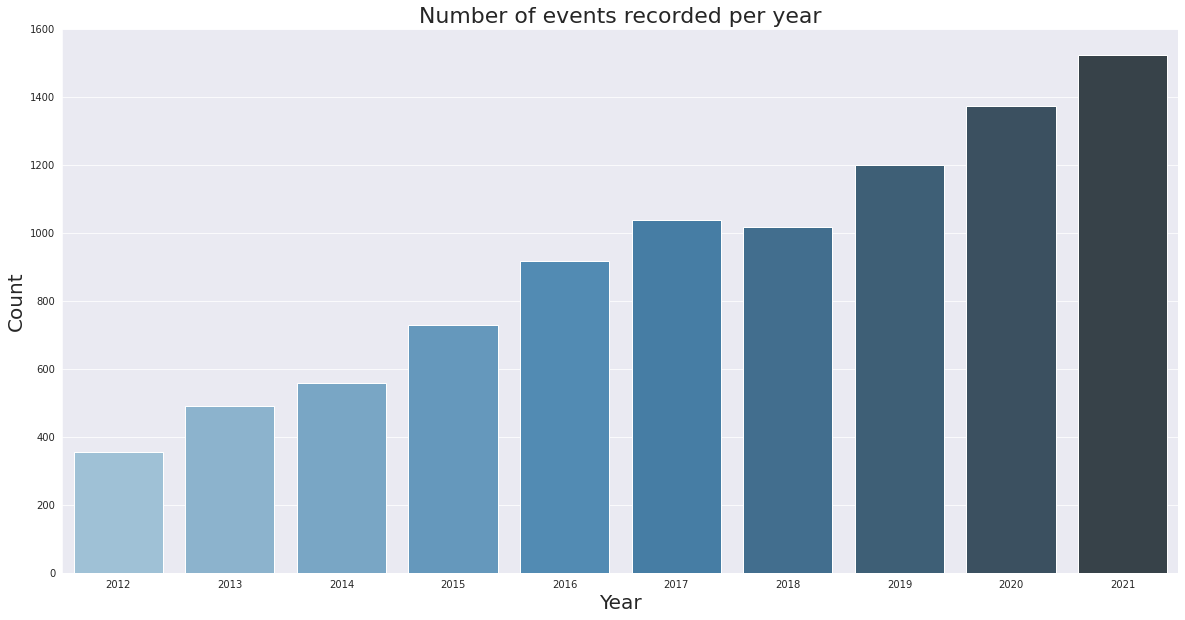

In [ ]:
# fig, ax = plt.subplots(figsize=(a4_dims))
plt.figure(figsize=fig_size)

p = sns.countplot(pd.to_datetime(df["Date"]).dt.year, palette="Blues_d")
p.set_xlabel("Year", fontsize=20)
p.set_ylabel("Count", fontsize=20)
p.set_title("Number of events recorded per year", fontsize=22)


### Top 10 cities with the most injuries

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


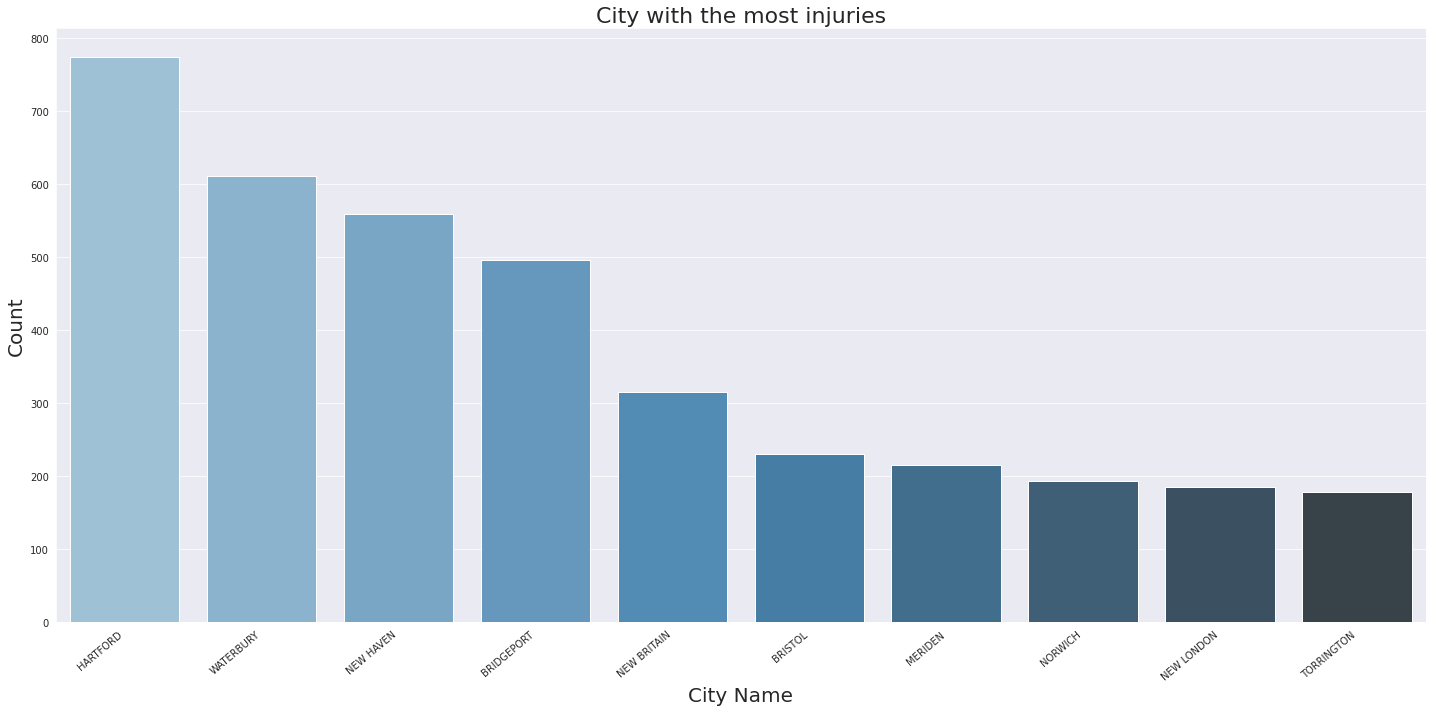

In [ ]:
fig, ax = plt.subplots(figsize=fig_size)

temp = df[df["Injury City"].isin(df["Injury City"].value_counts().sort_values(ascending=False).head(10).keys().values.tolist())]["Injury City"]

sns.countplot(temp, palette="Blues_d", ax=ax, order=temp.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel("City Name", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title("City with the most injuries", fontsize=22)
plt.tight_layout()
plt.show()

### Top 10 cities with the most deaths

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


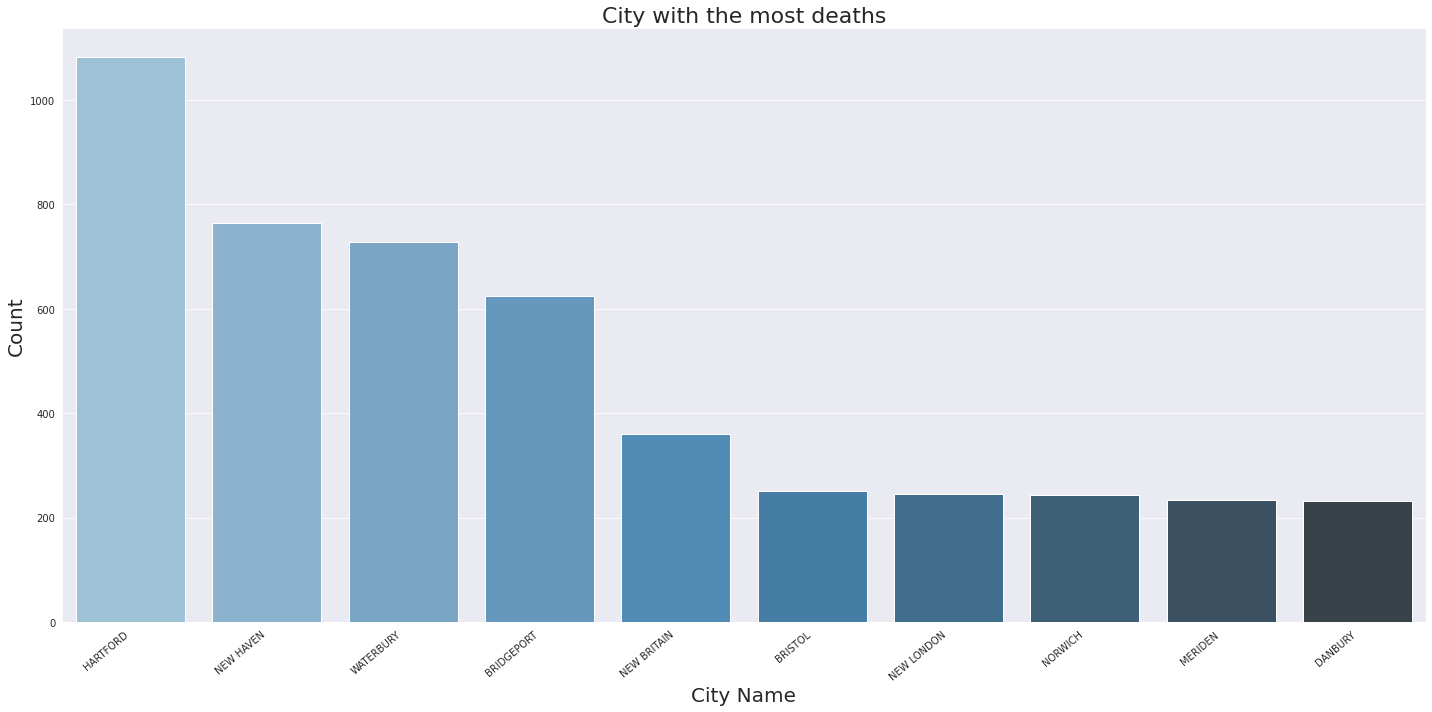

In [ ]:
fig, ax = plt.subplots(figsize=fig_size)

temp = df[df["Death City"].isin(df["Death City"].value_counts().sort_values(ascending=False).head(10).keys().values.tolist())]["Death City"]

sns.countplot(temp, palette="Blues_d", ax=ax, order=temp.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel("City Name", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title("City with the most deaths",fontsize=22)
plt.tight_layout()
plt.show()

### Top 10 Races with the most deaths

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


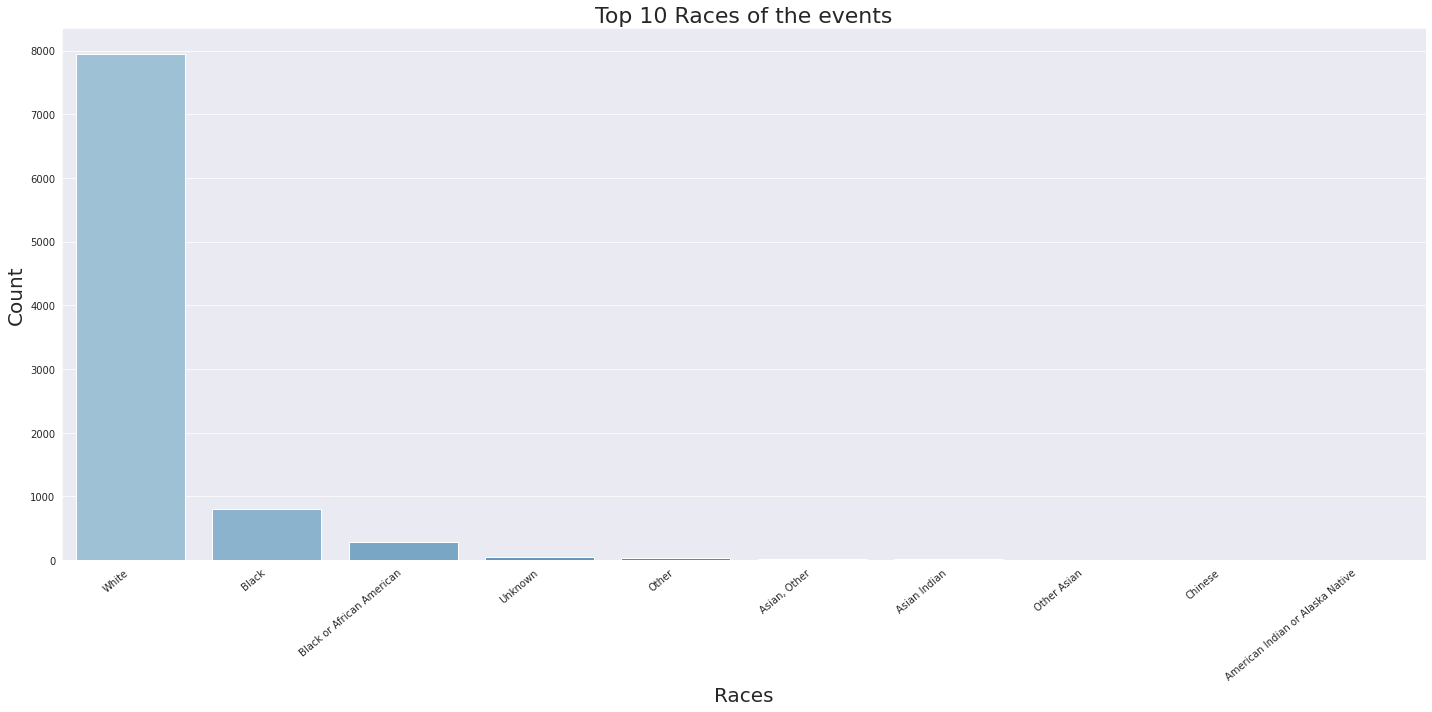

In [ ]:
fig, ax = plt.subplots(figsize=fig_size)

temp = df[df["Race"].isin(df["Race"].value_counts().sort_values(ascending=False).head(10).keys().values.tolist())]["Race"]

sns.countplot(temp, palette="Blues_d", ax=ax, order=temp.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel("Races", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title("Top 10 Races of the events", fontsize=22)
plt.tight_layout()
plt.show()

### Ethnicities with the most deaths

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


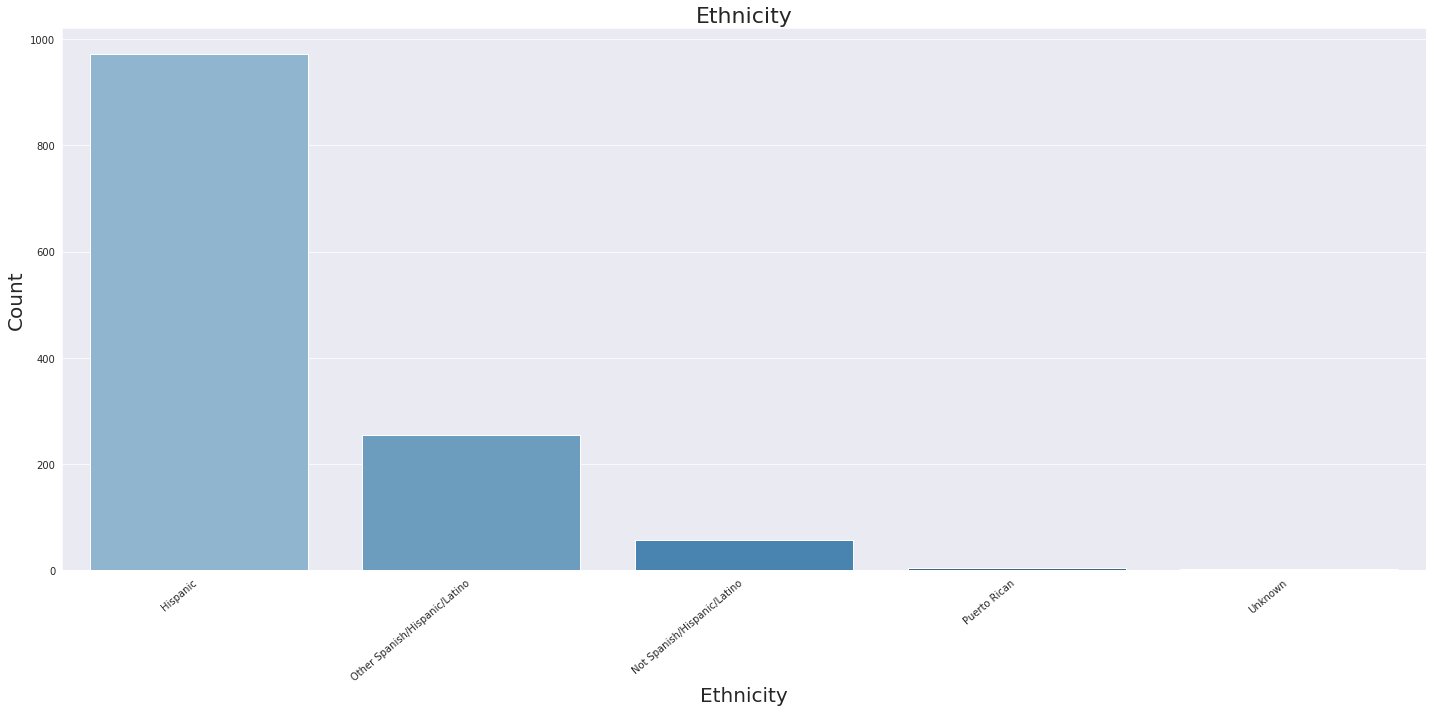

In [ ]:
fig, ax = plt.subplots(figsize=fig_size)

temp = df[df["Ethnicity"].isin(df["Ethnicity"].value_counts().sort_values(ascending=False).head(10).keys().values.tolist())]["Ethnicity"]

sns.countplot(temp, palette="Blues_d", ax=ax, order=temp.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel("Ethnicity", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title("Ethnicity", fontsize=22)
plt.tight_layout()
plt.show()

### Top 10 causes of deaths

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


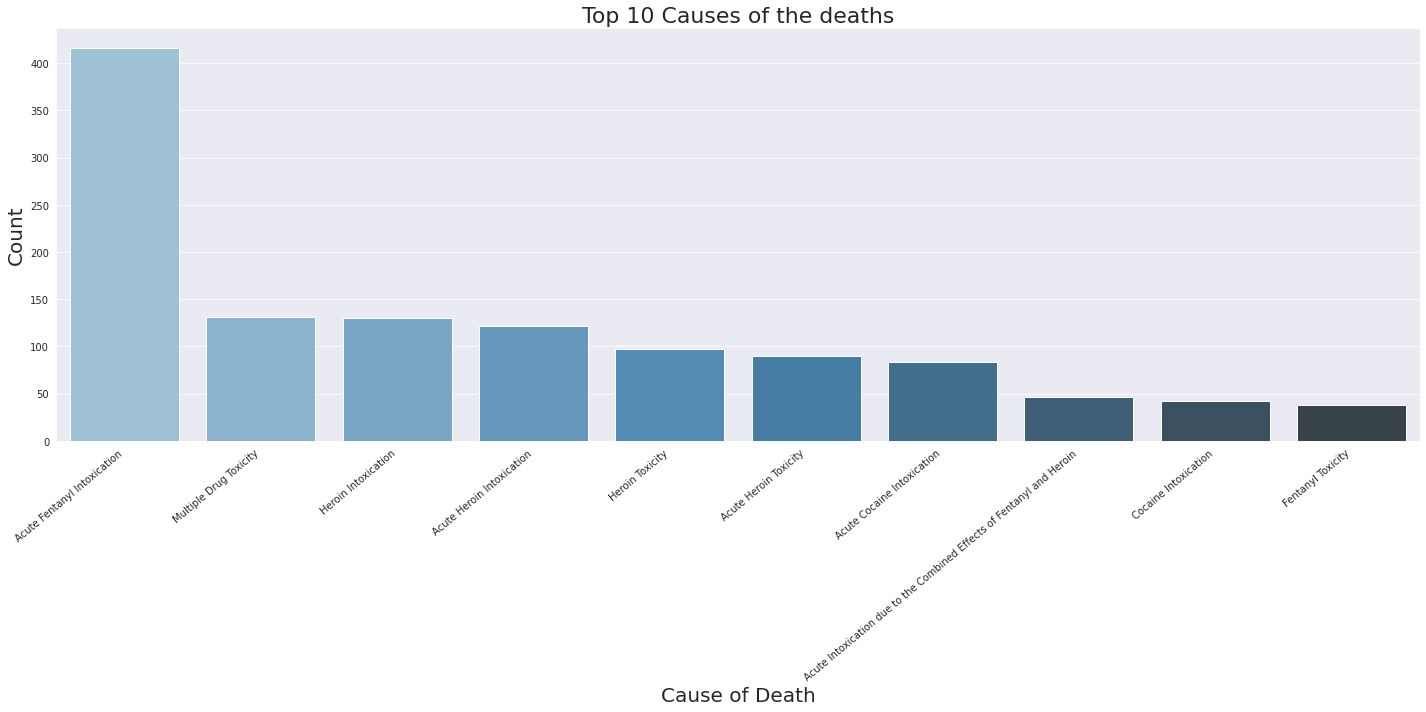

In [ ]:
fig, ax = plt.subplots(figsize=fig_size)

temp = df[df["Cause of Death"].isin(df["Cause of Death"].value_counts().sort_values(ascending=False).head(10).keys().values.tolist())]["Cause of Death"]

sns.countplot(temp, palette="Blues_d", ax=ax, order=temp.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel("Cause of Death", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title("Top 10 Causes of the deaths", fontsize=22)
plt.tight_layout()
plt.show()

### Top 10 Descriptions of Injury with deaths

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


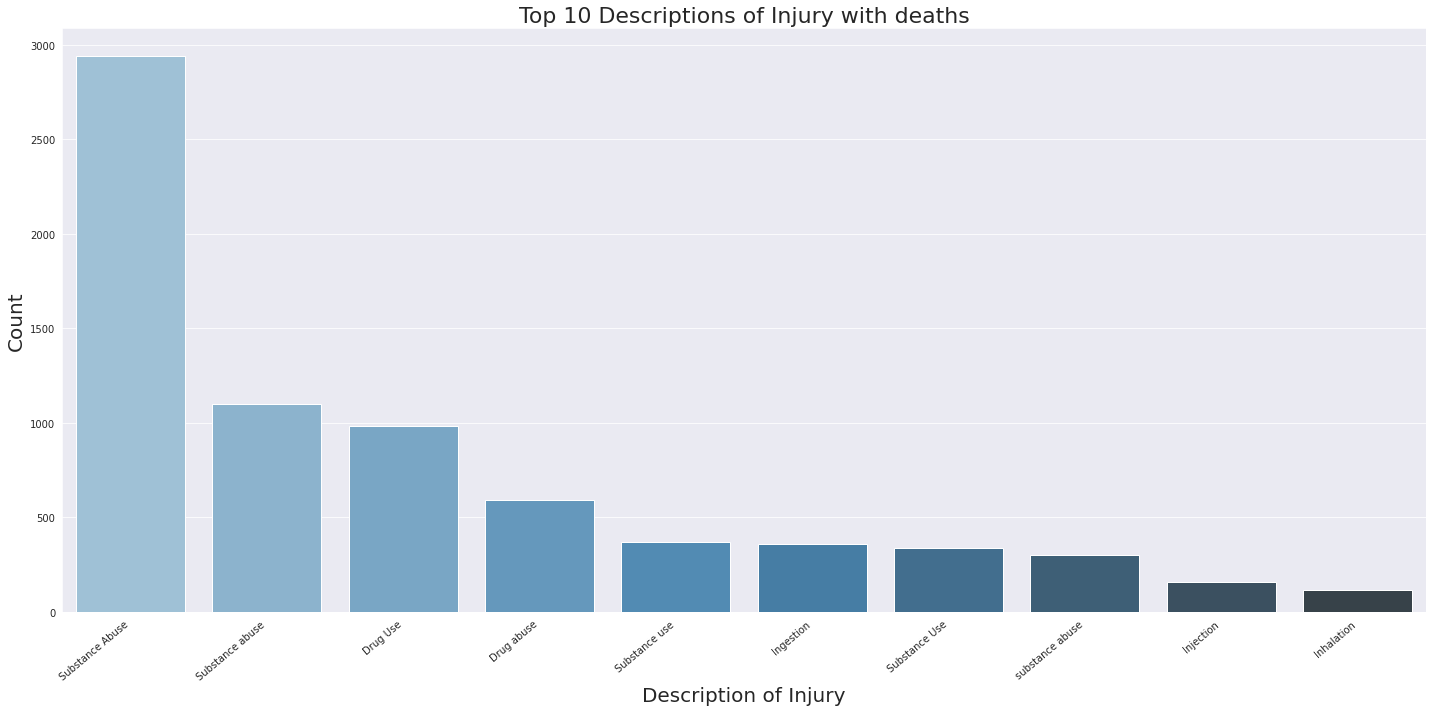

In [ ]:
fig, ax = plt.subplots(figsize=fig_size)

temp = df[df["Description of Injury"].isin(df["Description of Injury"].value_counts().sort_values(ascending=False).head(10).keys().values.tolist())]["Description of Injury"]

sns.countplot(temp, palette="Blues_d", ax=ax, order=temp.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel("Description of Injury", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title("Top 10 Descriptions of Injury with deaths", fontsize=22)
plt.tight_layout()
plt.show()

### Age distribution

#### Density Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age distribution')

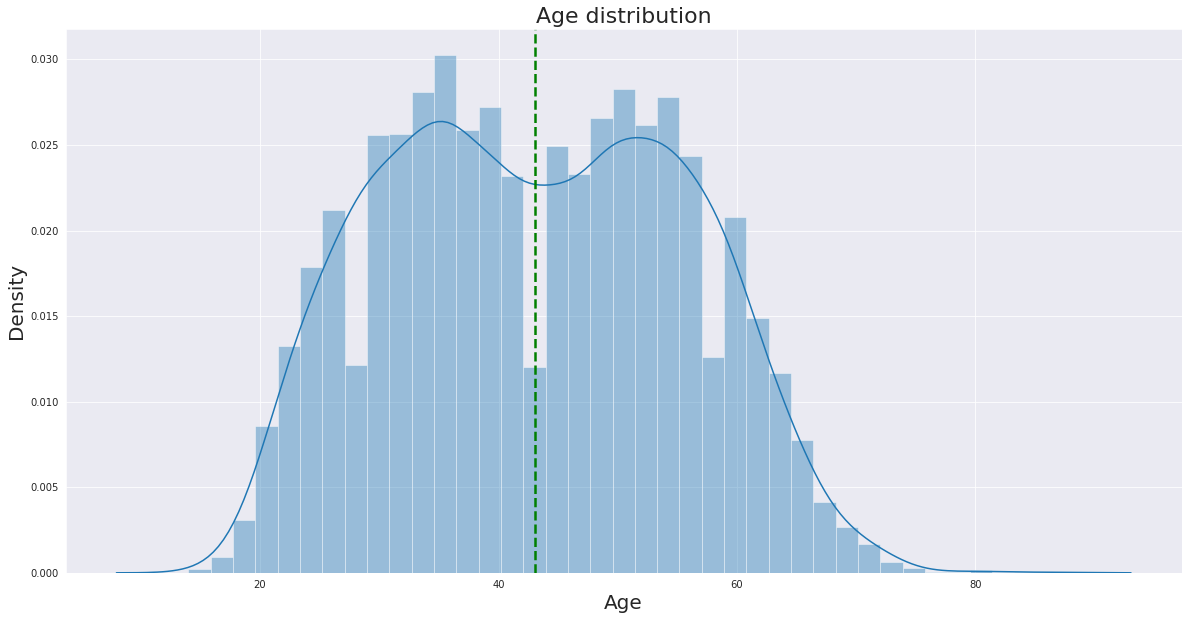

In [ ]:
plt.figure(figsize=(20, 10))

p = sns.distplot(df["Age"])
p.set_xlabel("Age", fontsize=20)
p.set_ylabel("Density", fontsize=20)
p.axvline(x=df.Age.mean(), color="green", ls="--", lw=2.5)
p.set_title("Age distribution", fontsize=22)

#### Box Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Age distribution')

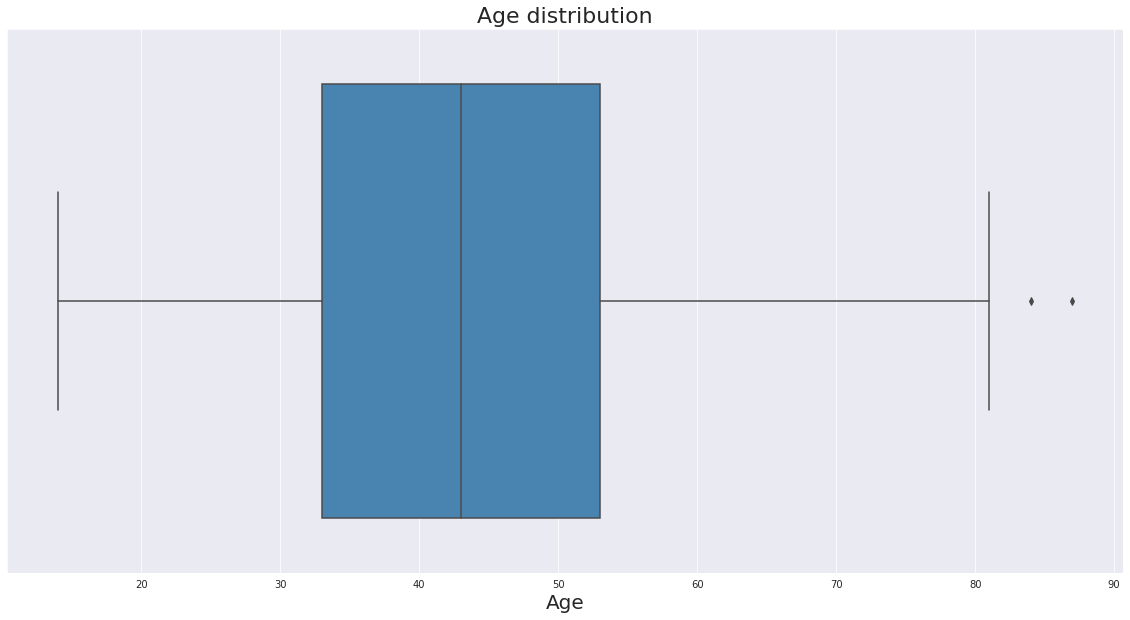

In [ ]:
plt.figure(figsize=(20, 10))

p = sns.boxplot(df["Age"], palette="Blues_d")
p.set_xlabel("Age", fontsize=20)

p.set_title("Age distribution", fontsize=22)

#### Age distribution of both the gender

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


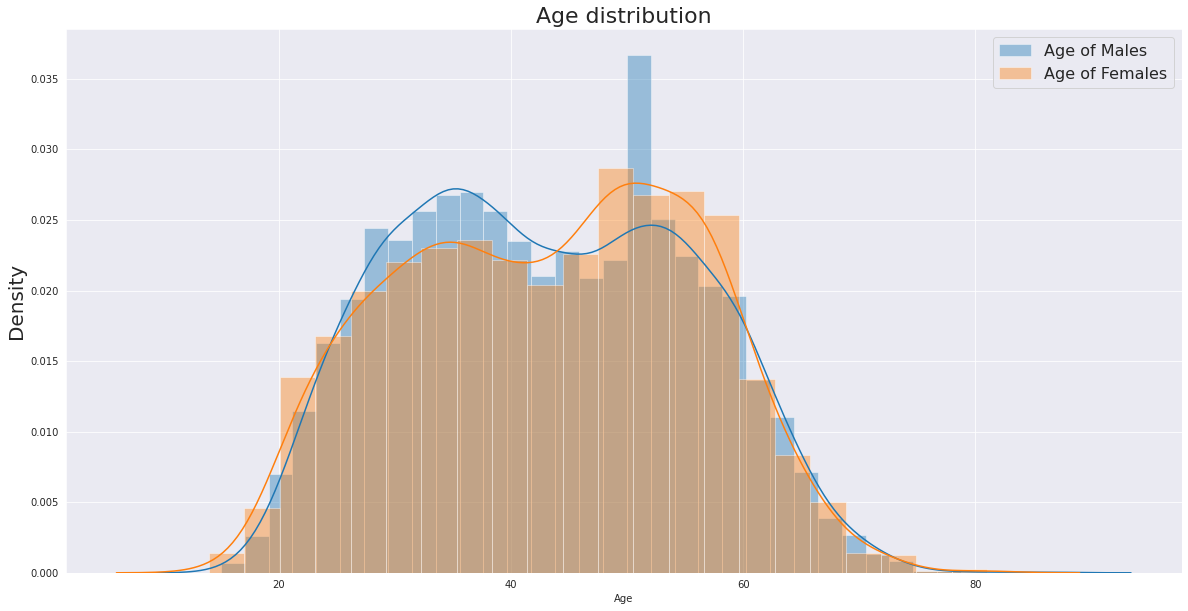

In [ ]:
plt.figure(figsize=(20, 10))
# fig, ax = plt.subplots(figsize=(a4_dims))

p1 = sns.distplot(df[df["Sex"] == "Male"]["Age"], label="Age of Males")
# p1.set_xlabel("Age of Driver1", fontsize=20)
p1.set_ylabel("Density", fontsize=20)
p1.set_title("Age distribution", fontsize=22)

p2 = sns.distplot(df[df["Sex"] == "Female"]["Age"], label="Age of Females")
# p2.set_xlabel("", fontsize=20)
p2.set_ylabel("Density", fontsize=20)
p2.set_title("Age distribution", fontsize=22)

plt.legend(fontsize=16)
plt.show()


### Distribution of Gender

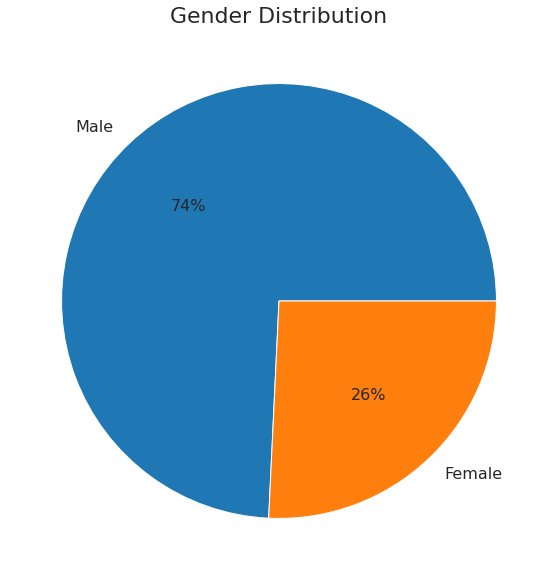

In [ ]:
gen_data1 = df.Sex.value_counts().values.tolist()[:2]


labels = ["Male", "Female"]
colors = sns.color_palette('pastel')[:2]

fig, ax1 = plt.subplots(1, 1, figsize=fig_size)

ax1.pie(gen_data1, labels=labels, autopct='%.0f%%', textprops={'fontsize': 16})
ax1.set_title("Gender Distribution", fontsize=22)

plt.show()

## Basic Exploration (BiVariate Anaylsis)

# Submission 2
## Data Cleaning

### 1. Removing unwanted columns

In [ ]:
cleaned_df = df.drop(columns=["Date Type", "Ethnicity"])

df.shape, "-->", cleaned_df.shape

((9202, 48), '-->', (9202, 46))

### 2. Removing Outliers

### 3. Fill NaNs with Unknown

## Data Transformation

### 1. Converting string type to pandas Timestamp **type**

In [ ]:
cleaned_transformed_df = cleaned_df.copy()
cleaned_transformed_df["Date"] = pd.to_datetime(cleaned_df.Date)

cleaned_transformed_df["Date"].dtype, cleaned_df["Date"].dtype

(dtype('<M8[ns]'), dtype('O'))

### 2. Extract Year from the Date column

In [ ]:
cleaned_transformed_df["Year"] = cleaned_transformed_df.Date.map(lambda x: x.year)
cleaned_transformed_df.Year.head()

0    2012
1    2012
2    2014
3    2014
4    2016
Name: Year, dtype: int64

### Extract month of the year from the Date column

In [ ]:
cleaned_transformed_df["MonthofYear"] = cleaned_transformed_df.Date.map(lambda x: x.strftime("%b"))
cleaned_transformed_df.MonthofYear.head()

0    May
1    Jun
2    Mar
3    Dec
4    Jan
Name: MonthofYear, dtype: object

### Encode 'Y' or 'N' to 1 or 0

In [ ]:
# for col in cleaned_transformed_df.columns[20:43]:
    # cleaned_transformed_df[col] = cleaned_transformed_df[col].map

cleaned_transformed_df[cleaned_transformed_df.columns[20:43].tolist()] = cleaned_transformed_df[cleaned_transformed_df.columns[20:43].tolist()].applymap(lambda x: 1 if x == 'Y' else 0)
cleaned_transformed_df

,Date,Age,Sex,Race,Residence City,Residence County,Residence State,Injury City,Injury County,Injury State,...,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo,Year,MonthofYear
0,2012-05-29,37.0,Male,Black,STAMFORD,FAIRFIELD,NaN,STAMFORD,NaN,CT,...,0,0,0,0,0,"STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","CT\n(41.575155, -72.738288)",2012,May
1,2012-06-27,37.0,Male,White,NORWICH,NEW LONDON,NaN,NORWICH,NaN,CT,...,0,0,0,0,0,"NORWICH, CT\n(41.524304, -72.075821)","NORWICH, CT\n(41.524304, -72.075821)","Norwich, CT\n(41.524304, -72.075821)",2012,Jun
2,2014-03-24,28.0,Male,White,HEBRON,NaN,NaN,HEBRON,NaN,CT,...,0,0,0,0,0,"HEBRON, CT\n(41.658069, -72.366324)","HEBRON, CT\n(41.658069, -72.366324)","Marlborough, CT\n(41.632043, -72.461309)",2014,Mar
3,2014-12-31,26.0,Female,White,BALTIC,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,"BALTIC, CT\n(41.617221, -72.085031)","CT\n(41.575155, -72.738288)","Baltic, CT\n(41.617221, -72.085031)",2014,Dec
4,2016-01-16,41.0,Male,White,SHELTON,FAIRFIELD,CT,SHELTON,NaN,NaN,...,0,0,0,1,0,"SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)","Bridgeport, CT\n(41.179195, -73.189476)",2016,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9197,2021-10-19,56.0,Male,Black or African American,STAMFORD,FAIRFIELD,CT,STAMFORD,FAIRFIELD,CT,...,0,0,0,1,0,"STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","Stamford, CT\n(41.051924, -73.539475)",2021,Oct
9198,2021-05-04,48.0,Male,Black or African American,WEST HAVEN,NEW HAVEN,CT,WEST HAVEN,NEW HAVEN,CT,...,0,0,0,0,0,"WEST HAVEN, CT\n(41.272336, -72.949817)","WEST HAVEN, CT\n(41.272336, -72.949817)","New Haven, CT\n(41.308252, -72.924161)",2021,May
9199,2021-05-15,59.0,Male,White,WETHERSFIELD,HARTFORD,CT,WETHERSFIELD,HARTFORD,CT,...,0,0,0,0,0,"WETHERSFIELD, CT\n(41.712487, -72.663607)","WETHERSFIELD, CT\n(41.712487, -72.663607)","Hartford, CT\n(41.765775, -72.673356)",2021,May
9200,2021-05-28,68.0,Male,Black or African American,HARTFORD,HARTFORD,CT,HARTFORD,HARTFORD,CT,...,0,0,0,0,0,"HARTFORD, CT\n(41.765775, -72.673356)","HARTFORD, CT\n(41.765775, -72.673356)","Hartford, CT\n(41.765775, -72.673356)",2021,May


In [ ]:
for col in cleaned_transformed_df.columns:
    if "Geo" in col:
        print(col)
        cleaned_transformed_df[col+"_latitude"] = cleaned_transformed_df[col].apply(lambda x: float((x.split("(")[1]).split(",")[0]) if isinstance(x, str) else x)
        cleaned_transformed_df[col+"_longitude"] = cleaned_transformed_df[col].apply(lambda x: float((x.split("(")[1]).split(",")[1].strip(")")) if isinstance(x, str) else x)

cleaned_transformed_df.columns

ResidenceCityGeo
InjuryCityGeo
DeathCityGeo


Index(['Date', 'Age', 'Sex', 'Race', 'Residence City', 'Residence County',
       'Residence State', 'Injury City', 'Injury County', 'Injury State',
       'Injury Place', 'Description of Injury', 'Death City', 'Death County',
       'Death State', 'Location', 'Location if Other', 'Cause of Death',
       'Manner of Death', 'Other Significant Conditions ', 'Heroin',
       'Heroin death certificate (DC)', 'Cocaine', 'Fentanyl',
       'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine',
       'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
       'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine',
       'Other Opioid', 'Any Opioid', 'Other', 'ResidenceCityGeo',
       'InjuryCityGeo', 'DeathCityGeo', 'Year', 'MonthofYear',
       'ResidenceCityGeo_latitude', 'ResidenceCityGeo_longitude',
       'InjuryCityGeo_latitude', 'InjuryCityGeo_longitude',
       'DeathCityGeo_latitude', '

In [ ]:
# list_of_drugs = []
# for col in cleaned_transformed_df.columns[20:43]:
#     print(col)

cleaned_transformed_df[cleaned_transformed_df.columns[20:43]].apply(lambda row: ', '.join(row.values.astype(str)), axis=1)

0       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
1       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
2       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
3       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
4       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
                              ...                        
9197    0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
9198    0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0...
9199    0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
9200    0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
9201    0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0...
Length: 9202, dtype: object

In [ ]:
cleaned_transformed_encoded_df = cleaned_transformed_df.copy()

for col in cleaned_transformed_df.columns[20:43]:
    cleaned_transformed_encoded_df[col] = cleaned_transformed_encoded_df[col].map(lambda x: str(col) if x == 1 else x)

cleaned_transformed_encoded_df

,Date,Age,Sex,Race,Residence City,Residence County,Residence State,Injury City,Injury County,Injury State,...,InjuryCityGeo,DeathCityGeo,Year,MonthofYear,ResidenceCityGeo_latitude,ResidenceCityGeo_longitude,InjuryCityGeo_latitude,InjuryCityGeo_longitude,DeathCityGeo_latitude,DeathCityGeo_longitude
0,2012-05-29,37.0,Male,Black,STAMFORD,FAIRFIELD,NaN,STAMFORD,NaN,CT,...,"STAMFORD, CT\n(41.051924, -73.539475)","CT\n(41.575155, -72.738288)",2012,May,41.051924,-73.539475,41.051924,-73.539475,41.575155,-72.738288
1,2012-06-27,37.0,Male,White,NORWICH,NEW LONDON,NaN,NORWICH,NaN,CT,...,"NORWICH, CT\n(41.524304, -72.075821)","Norwich, CT\n(41.524304, -72.075821)",2012,Jun,41.524304,-72.075821,41.524304,-72.075821,41.524304,-72.075821
2,2014-03-24,28.0,Male,White,HEBRON,NaN,NaN,HEBRON,NaN,CT,...,"HEBRON, CT\n(41.658069, -72.366324)","Marlborough, CT\n(41.632043, -72.461309)",2014,Mar,41.658069,-72.366324,41.658069,-72.366324,41.632043,-72.461309
3,2014-12-31,26.0,Female,White,BALTIC,NaN,NaN,NaN,NaN,NaN,...,"CT\n(41.575155, -72.738288)","Baltic, CT\n(41.617221, -72.085031)",2014,Dec,41.617221,-72.085031,41.575155,-72.738288,41.617221,-72.085031
4,2016-01-16,41.0,Male,White,SHELTON,FAIRFIELD,CT,SHELTON,NaN,NaN,...,"SHELTON, CT\n(41.316843, -73.092968)","Bridgeport, CT\n(41.179195, -73.189476)",2016,Jan,41.316843,-73.092968,41.316843,-73.092968,41.179195,-73.189476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9197,2021-10-19,56.0,Male,Black or African American,STAMFORD,FAIRFIELD,CT,STAMFORD,FAIRFIELD,CT,...,"STAMFORD, CT\n(41.051924, -73.539475)","Stamford, CT\n(41.051924, -73.539475)",2021,Oct,41.051924,-73.539475,41.051924,-73.539475,41.051924,-73.539475
9198,2021-05-04,48.0,Male,Black or African American,WEST HAVEN,NEW HAVEN,CT,WEST HAVEN,NEW HAVEN,CT,...,"WEST HAVEN, CT\n(41.272336, -72.949817)","New Haven, CT\n(41.308252, -72.924161)",2021,May,41.272336,-72.949817,41.272336,-72.949817,41.308252,-72.924161
9199,2021-05-15,59.0,Male,White,WETHERSFIELD,HARTFORD,CT,WETHERSFIELD,HARTFORD,CT,...,"WETHERSFIELD, CT\n(41.712487, -72.663607)","Hartford, CT\n(41.765775, -72.673356)",2021,May,41.712487,-72.663607,41.712487,-72.663607,41.765775,-72.673356
9200,2021-05-28,68.0,Male,Black or African American,HARTFORD,HARTFORD,CT,HARTFORD,HARTFORD,CT,...,"HARTFORD, CT\n(41.765775, -72.673356)","Hartford, CT\n(41.765775, -72.673356)",2021,May,41.765775,-72.673356,41.765775,-72.673356,41.765775,-72.673356


In [ ]:
cleaned_transformed_encoded_df["drug_compound"] = cleaned_transformed_encoded_df[cleaned_transformed_encoded_df.columns[20:43]].apply(lambda row: ', '.join([r for r in row.values.astype(str) if r != "0"]), axis=1)
cleaned_transformed_df["drug_compound"] = cleaned_transformed_encoded_df["drug_compound"]

In [ ]:
cleaned_transformed_df.to_excel("accidental_drug_related_deaths_cleaned_transformed.xlsx")